# This is for disparity from depth maps
There is a few different options for opening the images, ranging from PIL, pillow, OpenCV to matplotlib

In [165]:
#Import relevant modules
import os
from math import tan, radians

from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

(512, 512)

(512,)

(512,)

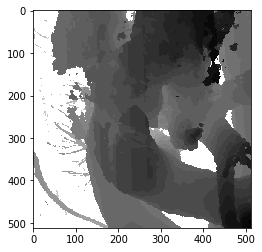

In [160]:
#Setup locations
base_dir = "Resources"
file_name = "depth.png"
image_location = os.path.join(base_dir, file_name)

#Note that these seem to produce rather different results
depth = Image.open(image_location)
depth.load()
data = np.asarray( depth, dtype= np.uint8 )
data.shape
img = mpimg.imread(image_location)
imgplot = plt.imshow(img, cmap=plt.cm.gray)

In [7]:
# Experiments
type(depth)
type(data)
type(img)

temp = img * 255
temp == data
img.shape

PIL.PngImagePlugin.PngImageFile

numpy.ndarray

numpy.ndarray

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

(512, 512)

In [8]:
def depth_to_disparity(depth_value, baseline, focal_length, shift = 0.0):
    """
    Returns a disparity value from a depth value
    
    Keyword arguments:
    depth_value -- the input depth
    baseline -- the distance between neighbouring cameras in the grid
    focal_length -- the depth image capturing camera's focal length
    shift -- an optional distance between neighbouring images 
          -- principal point offsets (default 0.0),
          -- note that this is from the HCI paper on their capture process
    """
    disparity = (baseline * focal_length) / depth_value - shift
    return disparity

In [9]:
def depth_buffer_to_eye(buffer_depth, near, far):
    """
    Returns eye space depth from a [0,1] depth buffer value.
    First converts the buffer value to NDC in [-1, 1].
    Then inverts the perspective projection to give eye space depth.
    
    Keyword arguments:
    buffer_depth -- the input depth buffer value
    near -- the depth of the near plane (positive)
    far -- the depth of the far plane (positive)
    """
    ndc_depth = 2.0 * buffer_depth - 1.0
    eye_depth = 2.0 * near * far / (near + far - ndc_depth * (far - near))
    return eye_depth

In [163]:
def real_value_to_pixel(real_value, focal_length, fov, image_pixel_size):
    """
    Converts a value in real units to a pixel value by similar triangles

    Keyword arguments:
    focal_length -- camera focal length in real units
    fov -- camera field of view in degrees
    image_pixel_size -- the width of the image in pixels
    """

    image_sensor_size = 2 * focal_length * tan(radians(fov / 2.0))
    return real_value * image_pixel_size / image_sensor_size

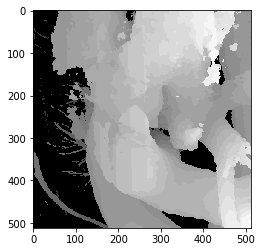

In [168]:
eye_depth = depth_buffer_to_eye(img, 6.0, 1000)
disparity = depth_to_disparity(eye_depth, baseline = 1, focal_length = 1.7, shift = 0)
disparity = real_value_to_pixel(disparity, 1.7, 66, 512)
disparity2 = depth_to_disparity(data, baseline = 1, focal_length = 1.7, shift = 0)
#imgplot = plt.imshow(disparity, cmap=plt.cm.gray)
imgplot2 = plt.imshow(disparity, cmap= plt.cm.gray)
#img
#eye_depth
#disparity
#disparity2

In [11]:
#plt.hist(eye_depth.ravel(), bins=256, range=(6, 1000), fc='k', ec='k')

In [169]:
#Creates an array of combinations of image pixel co-ords
grid = np.meshgrid(np.arange(disparity.shape[0]),np.arange(disparity.shape[1]), indexing = 'ij')
stacked = np.stack(grid, 2)
pixels = stacked.reshape(-1, 2)

#Create an array of distances by disparities
distance = np.array([1, 2])
repeated = np.repeat(disparity, 2, -1).reshape((512, 512, 2))
result = (repeated * distance)
np.moveaxis(result, 2, 0)

#novel_pixels = (pixels + result.reshape(-1, 2)).astype(np.int)
novel_pixels = (grid + result.transpose()).astype(np.int)
data == data[grid]
novel_pixels.reshape(2, 512, 512)
res = data[[novel_pixels[0], novel_pixels[1]]]
plt.imshow(res)

array([[[  0.39420542,   0.39420542,   0.39420542, ...,   4.49187994,
           4.49187994,   4.49187994],
        [  0.39420542,   0.39420542,   0.39420542, ...,   4.49187994,
           4.49187994,   4.49187994],
        [  0.39420542,   0.39420542,   0.39420542, ...,   4.49187994,
           4.49187994,   4.49187994],
        ..., 
        [  0.39420542,   0.39420542,   0.39420542, ...,   7.30903101,
           7.30903101,   7.05292606],
        [  0.39420542,   0.39420542,   0.39420542, ...,   7.30903101,
           7.30903101,   7.30903101],
        [  0.39420542,   0.39420542,   0.39420542, ...,   7.30903101,
           7.30903101,   7.30903101]],

       [[  0.78841084,   0.78841084,   0.78841084, ...,   8.98375988,
           8.98375988,   8.98375988],
        [  0.78841084,   0.78841084,   0.78841084, ...,   8.98375988,
           8.98375988,   8.98375988],
        [  0.78841084,   0.78841084,   0.78841084, ...,   8.98375988,
           8.98375988,   8.98375988],
        ...,

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ..., 
        [513, 513, 513, ..., 516, 516, 516],
        [514, 514, 514, ..., 517, 517, 517],
        [515, 515, 515, ..., 518, 518, 518]],

       [[  0,   1,   2, ..., 509, 510, 511],
        [  0,   1,   2, ..., 509, 510, 511],
        [  0,   1,   2, ..., 509, 510, 511],
        ..., 
        [  8,   9,  10, ..., 523, 524, 525],
        [  8,   9,  10, ..., 523, 524, 525],
        [  8,   9,  10, ..., 523, 524, 525]]])

IndexError: index 512 is out of bounds for axis 0 with size 512

array([[  0,   0],
       [  0,   1],
       [  0,   2],
       ..., 
       [511, 509],
       [511, 510],
       [511, 511]])

array([[  0,   1],
       [  0,   2],
       [  0,   3],
       ..., 
       [511, 538],
       [511, 539],
       [511, 540]])

[[  0   0   0]
 [113  80  61]
 [111  79  60]
 ..., 
 [ 69  31  23]
 [ 63  32  22]
 [ 64  33  23]]


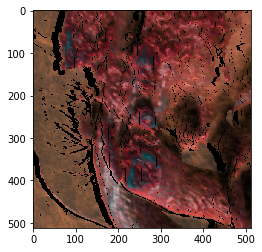

In [170]:
def valid_pixel(pixel, img_size):
    """returns if a pixel co-ordinate lies inside the image grid"""
    size_x, size_y = img_size
    valid = ( ((pixel[0] > -1) and (pixel[0] < size_x)) and 
              ((pixel[1] > -1) and (pixel[1] < size_y)) )
    return valid
    
ref_view = Image.open(os.path.join("Resources", "colour.png"))
ref_view.load()
ref_view = np.asarray(ref_view, dtype= np.uint8)[:, :, :3]
size_x, size_y = ref_view.shape[0:2]

novel_view = np.zeros(ref_view.shape, dtype = np.uint8)

#Create an array of pixel positions
grid = np.meshgrid(np.arange(size_x), np.arange(size_y), indexing = 'ij')
stacked = np.stack(grid, 2)
pixels = stacked.reshape(-1, 2)
#pixels

distance = (0, 4)
# disparity[0, 1] = 2
# for x in range(400, 500):
#     for y in range(size_y):
#         disparity[x, y] = 512
#Repeat the elements of the disparity_map to match the distance
repeated = np.repeat(disparity, 2, -1).reshape((size_x * size_y, 2))
result = (repeated * distance).astype(int)

novel_pixels = pixels + result
pixels
novel_pixels

for x, y in zip(novel_pixels, pixels):
    if valid_pixel(x, ref_view.shape[0:2]):
        novel_view[x[0], x[1]] = ref_view[y[0], y[1]]

plt.imshow(novel_view)
print(novel_view[500])

array([[[105,  74,  53],
        [  6,   4,   2],
        [255, 255, 255],
        ..., 
        [253, 248, 248],
        [248, 248, 245],
        [247, 250, 247]],

       [[107,  76,  55],
        [  3,   1,   0],
        [  2,   1, 255],
        ..., 
        [252, 249, 248],
        [247, 248, 246],
        [246, 250, 246]],

       [[112,  79,  55],
        [  1, 255,   0],
        [  1,   1,   0],
        ..., 
        [251, 250, 248],
        [247, 248, 246],
        [245, 249, 246]],

       ..., 
       [[115,  81,  62],
        [  0,   0, 255],
        [  0,   1,   1],
        ..., 
        [ 17,   2,   3],
        [ 22, 255,   3],
        [ 19, 254,   3]],

       [[113,  80,  61],
        [  0,   0,   0],
        [  1,   1,   0],
        ..., 
        [  8,   1, 254],
        [ 14, 254, 255],
        [ 19, 253,   1]],

       [[112,  79,  61],
        [255,   0,   0],
        [  3,   2,   1],
        ..., 
        [  7,   0, 251],
        [  0, 254, 249],
        [ 11, 253,

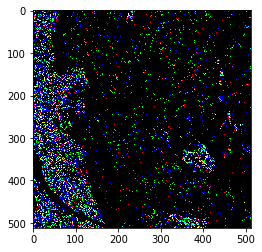

In [178]:
#plt.imshow(ref_view)
#plt.imshow((ref_view - novel_view).astype(np.uint8), cmap=plt.cm.gray)
plt.imshow((ref_view == novel_view).astype(np.uint8) *255, cmap=plt.cm.gray)
ref_view - novel_view

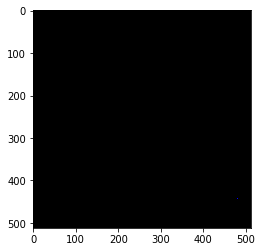

In [156]:
plt.imshow((np.zeros(ref_view.shape, dtype = np.uint8) == novel_view).astype(np.uint8) * 255)

In [157]:
novel_view2 = np.zeros(ref_view.shape, dtype = np.uint8)
for x in range(size_x):
    for y in range(size_y):
        res = np.repeat(disparity[x, y], 2, -1) * distance
        new_pixel = ((x,y) + res).astype(int)
        if(valid_pixel(new_pixel, (size_x, size_y))):
            novel_view2[new_pixel[0], new_pixel[1]] = ref_view[x, y]

for x in range(size_x):
    for y in range(size_y):
        arr1 = novel_view2[x, y]
        arr2 = novel_view[x, y]
        if(np.all(arr1 != arr2)):
            print('whoops at: {} {}'.format(x, y))
            print(arr1)
            print(arr2)
            break